In [55]:
%%html
<style>
table {float:left}
</style>

| Models   | Simulations length | Average period |
|  :---    | :----              | :---           |
| OsloCTM3 | 20 years           |   year 20      |
| WACCM6   | 18 years           | last 5 years   |
| INCA     | 10 years           | last 3 years   |
| GFDL*    | 50 years           | last 40 years  | 


In [56]:

import numpy as np
import pandas as pd
import matplotlib

from matplotlib import pyplot as plt
%matplotlib inline
import uncertainties
from uncertainties import ufloat
from uncertainties import unumpy
from uncertainties.umath import *

import ipywidgets as widgets
from ipywidgets import interact, interact_manual


pd.set_option('display.float_format', lambda x: '{:,.4f}'.format(x) if abs(x)<0 else ('{:,.2f}'.format(x) if abs(x)<10 else ('{:,.1f}'.format(x) if abs(x)<100 else '{:,.0f}'.format(x))))

In [57]:
path = r"./input/"
outputpath= r"./output/"

In [58]:
#AGWP100_CO2 [mW yr m-2 Tg-1] Source: REF.
agwp100_CO2 = 0.09170

#CH4 tau_strat[yr] Source: REF
tau_strat = 120.0

#CH4 tau_soil [yr] Source: REF
tau_soil = 160.0

#Specific RF for CH4 [mW m-2 ppb-1] Etminan et al., 2016
spec_rf_ch4 = 0.44300

In [59]:
adjust_drydep = False
if(adjust_drydep):
    drydep = 80.0
    outputpath = outputpath + 'drydep_'+ f'{drydep:.0f}_'

In [182]:
unc_atmloss = 0.01
unc_drydep = 0.1

In [193]:
file = 'H2_burden.txt'
df_h2_burden = pd.read_csv(path + file, sep=';',index_col=0,header=0)
delta = df_h2_burden.loc['10H2']-df_h2_burden.loc['CTRL']
delta.name = 'deltaH2'
df_h2_burden = df_h2_burden.append(delta)
print(df_h2_burden)
df_mm_h2_burden = df_h2_burden.mean(axis=1)
df_mm_h2_burden

          OSLOCTM3  WACCM6-2deg  INCA  GFDL-emi  OSLOCTM3-emi
Scenario                                                     
CTRL           196          195   194       192           209
10H2           215          213   213       656           240
10CH4          197          195   195       NaN           NaN
deltaH2       18.7         18.7  18.6       464          30.8


/tmp/ipykernel_5054/1024000643.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_h2_burden = df_h2_burden.append(delta)


Scenario
CTRL      197
10H2      307
10CH4     196
deltaH2   110
dtype: float64

In [62]:
file = 'H2_drydep.txt'
df_h2_drydep = pd.read_csv(path + file, sep=';',index_col=0,header=0)


In [63]:
if(adjust_drydep):
    print('NB drydep adjusted')
    
    #Adjust by the relative adjustment in the control simulations
    adjust = drydep/df_h2_drydep.loc['CTRL']
    df_h2_drydep = df_h2_drydep*adjust
    
df_h2_drydep
#df_h2_drydep_unc = df_h2_drydep*unc_drydep
#df_h2_drydep_u = unumpy.uarray(df_h2_drydep, np.nan_to_num(df_h2_drydep_unc))
#df_h2_drydep_udf = pd.DataFrame(df_h2_drydep_u, columns=['OSLOCTM3','WACCM6-2deg','INCA','GFDL-emi','OSLOCTM3-emi'], index = ['CTRL','10H2','10CH4'])

#df_h2_drydep_udf
df_mm_h2_drydep = df_h2_drydep.mean(axis=1)
df_mm_h2_drydep


Scenario
CTRL    59.5
10H2    94.9
10CH4   46.1
dtype: float64

In [64]:
file = 'H2_atm_loss.txt'

df_h2_atmloss = pd.read_csv(path + file, sep=';',index_col=0,header=0)

#df_h2_atmloss_unc = df_h2_atmloss*unc_atmloss
#df_h2_atmloss_u = unumpy.uarray(df_h2_atmloss,  np.nan_to_num(df_h2_atmloss_unc))
#df_h2_atmloss_udf = pd.DataFrame(df_h2_atmloss_u, columns=['OSLOCTM3','WACCM6-2deg','INCA','GFDL-emi','OSLOCTM3-emi'], index = ['CTRL','10H2','10CH4'])
#df_h2_atmloss_udf
df_mm_h2_atmloss = df_h2_atmloss.mean(axis=1)
df_mm_h2_atmloss

Scenario
CTRL    26.3
10H2    38.1
10CH4   19.4
dtype: float64

In [183]:
df_h2_loss = df_h2_atmloss + df_h2_drydep
print(df_h2_loss)
#df_min_h2_loss = df_h2_loss.min(axis=1)
#print(df_min_h2_loss)
#df_max_h2_loss = df_h2_loss.max(axis=1)
#print(df_max_h2_loss)

df_mm_h2_loss = df_mm_h2_atmloss + df_mm_h2_drydep
print(df_mm_h2_loss)
df_std_h2_loss = df_h2_loss.std(ddof=1, axis=1)
print(df_std_h2_loss)

df_mm_h2_loss_u = unumpy.uarray(df_mm_h2_loss, unc_atmloss)
print(df_mm_h2_loss_u)
df_mm_h2_loss_udf = pd.DataFrame(df_mm_h2_loss_u, index = ['CTRL','10H2','10CH4'])
print(df_mm_h2_loss_udf)

          OSLOCTM3  WACCM6-2deg  INCA  GFDL-emi  OSLOCTM3-emi
Scenario                                                     
CTRL          87.9          102  74.2      76.8          88.4
10H2          96.4          112  81.4       273           102
10CH4         87.2          101  73.7       NaN          0.00
Scenario
CTRL    85.9
10H2     133
10CH4   65.5
dtype: float64
Scenario
CTRL    11.1
10H2    79.1
10CH4   45.1
dtype: float64
[85.85876368497122+/-0.01 132.99005060754777+/-0.01
 65.49728379148797+/-0.01]
                     0
CTRL    85.859+/-0.010
10H2   132.990+/-0.010
10CH4   65.497+/-0.010


In [184]:
file = 'H2_atm_prod.txt'
df_h2_atmprod = pd.read_csv(path + file, sep=';',index_col=0,header=0)
df_h2_atmprod
df_mm_h2_atmprod = df_h2_atmprod.mean(axis=1)
df_mm_h2_atmprod

Scenario
CTRL    47.6
10H2    47.2
10CH4   36.1
dtype: float64

In [185]:
df_h2_estemis = df_h2_atmloss.loc['CTRL'] + df_h2_drydep.loc['CTRL'] - df_h2_atmprod.loc['CTRL']
#df_h2_estemis = df_h2_atmloss_udf.loc['CTRL'] + df_h2_drydep.loc['CTRL'] - df_h2_atmprod.loc['CTRL']
df_h2_estemis
df_mm_h2_estemis = df_mm_h2_atmloss.loc['CTRL'] + df_mm_h2_drydep.loc['CTRL'] - df_mm_h2_atmprod.loc['CTRL']
df_mm_h2_estemis

38.28788307383348

In [186]:
file = 'H2_surfconc.txt'
df_h2_surfconc = pd.read_csv(path + file, sep=';',index_col=0,header=0)
delta = df_h2_surfconc.loc['10H2']-df_h2_surfconc.loc['CTRL']
delta.name = 'deltaH2'
df_h2_surfconc = df_h2_surfconc.append(delta)
df_h2_surfconc
df_mm_h2_surfconc = df_h2_surfconc.mean(axis=1)
df_mm_h2_surfconc


/tmp/ipykernel_5054/3117829227.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_h2_surfconc = df_h2_surfconc.append(delta)


Scenario
CTRL      539
10H2      858
deltaH2   319
dtype: float64

In [192]:
df_h2_lifetime = (df_h2_burden.drop('deltaH2')/((df_h2_loss)))
print(df_h2_lifetime)
print(df_mm_h2_burden.drop('deltaH2'))
print(df_mm_h2_loss_u)
df_mm_h2_lifetime = (df_mm_h2_burden.drop('deltaH2')/((df_mm_h2_loss_u)))
df_mm_h2_lifetime

          OSLOCTM3  WACCM6-2deg  INCA  GFDL-emi  OSLOCTM3-emi
Scenario                                                     
CTRL          2.23         1.91  2.62      2.50          2.36
10H2          2.23         1.91  2.62      2.40          2.35
10CH4         2.26         1.93  2.64       NaN           NaN
Scenario
CTRL    197
10H2    307
10CH4   196
dtype: float64
[85.85876368497122+/-0.01 132.99005060754777+/-0.01
 65.49728379148797+/-0.01]


Scenario
CTRL     2.29626+/-0.00027
10H2     2.31064+/-0.00017
10CH4      2.9871+/-0.0005
dtype: object

In [188]:
df_h2_atm_lifetime = df_h2_burden.drop('deltaH2')/df_h2_atmloss
df_h2_atm_lifetime

df_mm_h2_atm_lifetime = df_mm_h2_burden.drop('deltaH2')/df_mm_h2_atmloss
df_mm_h2_atm_lifetime


Scenario
CTRL    7.48
10H2    8.06
10CH4   10.1
dtype: float64

In [83]:
df_h2_flux = df_h2_burden.drop('deltaH2')/df_h2_lifetime
#Add delta flux 10H2:

delta = df_h2_flux.loc['10H2']-df_h2_flux.loc['CTRL']
delta.name = 'deltaH2'
df_h2_flux = df_h2_flux.append(delta)
#Add delta flux 10CH4:
delta = df_h2_flux.loc['10CH4']-df_h2_flux.loc['CTRL'].astype(float)
delta.name = 'deltaCH4'
df_h2_flux = df_h2_flux.append(delta)

df_mm_h2_flux = df_h2_flux.mean(axis=1)
df_mm_h2_flux


/tmp/ipykernel_5054/688235451.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_h2_flux = df_h2_flux.append(delta)
/tmp/ipykernel_5054/688235451.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_h2_flux = df_h2_flux.append(delta)


Scenario
CTRL        85.9
10H2         133
10CH4       87.3
deltaH2     47.1
deltaCH4   -0.70
dtype: float64

In [84]:
file = 'CH4_burden.txt'
df_ch4_burden = pd.read_csv(path + file, sep=';',index_col=0,header=0)
delta = df_ch4_burden.loc['10CH4']-df_ch4_burden.loc['CTRL']
delta.name = 'deltaCH4'
df_ch4_burden = df_ch4_burden.append(delta)
df_ch4_burden
df_mm_ch4_burden = df_ch4_burden.mean(axis=1)
df_mm_ch4_burden

/tmp/ipykernel_5054/3050380812.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ch4_burden = df_ch4_burden.append(delta)


Scenario
CTRL       4,984
10H2       4,985
10CH4      5,498
deltaCH4     501
dtype: float64

In [85]:
file = 'CH4_loss.txt'
df_ch4_loss = pd.read_csv(path + file, sep=';',index_col=0,header=0)
df_ch4_loss
df_mm_ch4_loss = df_ch4_loss.mean(axis=1)
df_mm_ch4_loss

Scenario
CTRL    645
10H2    633
10CH4   696
dtype: float64

In [87]:
file = 'CH4_surfconc.txt'
df_ch4_surfconc = pd.read_csv(path + file, sep=';',index_col=0,header=0)
delta = df_ch4_surfconc.loc['10CH4']-df_ch4_surfconc.loc['CTRL']
delta.name = 'deltaCH4'
df_ch4_surfconc = df_ch4_surfconc.append(delta)
df_ch4_surfconc
df_mm_ch4_surfconc = df_ch4_surfconc.mean(axis=1)
df_mm_ch4_surfconc

/tmp/ipykernel_5054/932771260.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ch4_surfconc = df_ch4_surfconc.append(delta)


Scenario
CTRL       1,810
10CH4      1,993
deltaCH4     181
dtype: float64

In [88]:
df_ch4_lifetime = df_ch4_burden.drop('deltaCH4')/df_ch4_loss
df_ch4_lifetime
df_mm_ch4_lifetime = df_ch4_lifetime.mean(axis=1)
df_mm_ch4_lifetime

Scenario
CTRL    7.82
10H2    7.99
10CH4   8.01
dtype: float64

In [90]:
df_ch4_tot_lifetime = 1.0/(1.0/df_ch4_lifetime + 1.0/tau_strat + 1.0/tau_soil)
df_ch4_tot_lifetime
df_mm_ch4_tot_lifetime = df_ch4_tot_lifetime.mean(axis=1)
df_mm_ch4_tot_lifetime

Scenario
CTRL    7.01
10H2    7.15
10CH4   7.16
dtype: float64

In [91]:
df_ch4_flux = df_ch4_burden.drop('deltaCH4')/df_ch4_tot_lifetime
#Add delta CH4 flux 10H2
delta = df_ch4_flux.loc['10H2']-df_ch4_flux.loc['CTRL']
delta.name = 'deltaH2'
df_ch4_flux = df_ch4_flux.append(delta)
#Add delta CH4 flux 10CH4
delta = df_ch4_flux.loc['10CH4']-df_ch4_flux.loc['CTRL']
delta.name = 'deltaCH4'
df_ch4_flux = df_ch4_flux.append(delta)
df_ch4_flux
df_mm_ch4_flux = df_ch4_flux.mean(axis=1)
df_mm_ch4_flux

/tmp/ipykernel_5054/2182549902.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ch4_flux = df_ch4_flux.append(delta)
/tmp/ipykernel_5054/2182549902.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ch4_flux = df_ch4_flux.append(delta)


Scenario
CTRL         717
10H2         706
10CH4        776
deltaH2    -11.5
deltaCH4    50.0
dtype: float64

In [92]:
file = 'ozone_du_trop.txt'
df_ozone_du_trop = pd.read_csv(path+file, sep=';',index_col=0,header=0)
df_ozone_du_trop
df_mm_ozone_du_trop = df_ozone_du_trop.mean(axis=1)
df_mm_ozone_du_trop

Scenario
10H2    0.18
10CH4   0.75
dtype: float64

In [93]:
file = 'ozone_du_strat.txt'
df_ozone_du_strat = pd.read_csv(path+file, sep=';',index_col=0,header=0)
df_ozone_du_strat
df_mm_ozone_du_strat = df_ozone_du_strat.mean(axis=1)
df_mm_ozone_du_strat

Scenario
10H2    -0.05
10CH4    0.77
dtype: float64

In [94]:
file = 'ozone_du_strat_6060.txt'
df_ozone_du_strat_6060 = pd.read_csv(path+file, sep=';',index_col=0,header=0)
df_ozone_du_strat_6060
df_mm_ozone_du_strat_6060 = df_ozone_du_strat_6060.mean(axis=1)
df_mm_ozone_du_strat_6060

Scenario
10H2    -0.06
10CH4    0.56
dtype: float64

In [95]:
file = 'ozone_du_strat_gt60.txt'
df_ozone_du_strat_gt60 = pd.read_csv(path+file, sep=';',index_col=0,header=0)
df_ozone_du_strat_gt60
df_mm_ozone_du_strat_gt60 = df_ozone_du_strat_gt60.mean(axis=1)
df_mm_ozone_du_strat_gt60


Scenario
10H2    -0.00
10CH4    0.22
dtype: float64

In [97]:
file = 'ozone_rf.txt'
df_ozone_rf = pd.read_csv(path+file, sep=';',index_col=0,header=0)
df_ozone_rf
df_mm_ozone_rf = df_ozone_rf.mean(axis=1)
df_mm_ozone_rf

Scenario
10H2    8.36
10CH4   36.0
dtype: float64

In [98]:
df_ozone_rf['OSLOCTM3-emi'].loc['10CH4'] = df_ozone_rf['OSLOCTM3'].loc['10CH4'] 
df_ozone_rf
df_mm_ozone_rf = df_ozone_rf.mean(axis=1)
df_mm_ozone_rf

Scenario
10H2    8.36
10CH4   37.0
dtype: float64

In [99]:
file = 'H2O_rf.txt'
df_h2o_rf = pd.read_csv(path+file, sep=';',index_col=0,header=0)
df_h2o_rf
df_mm_h2o_rf = df_h2o_rf.mean(axis=1)
df_mm_h2o_rf


Scenario
10H2    0.96
10CH4   6.15
dtype: float64

In [100]:
df_h2o_rf['OSLOCTM3-emi'].loc['10CH4'] = df_h2o_rf['OSLOCTM3'].loc['10CH4'] 
df_h2o_rf
df_mm_h2o_rf = df_h2o_rf.mean(axis=1)
df_mm_h2o_rf

Scenario
10H2    0.96
10CH4   7.14
dtype: float64

In [101]:
file = 'H2O_rf_gfdl.txt'
h2o_rf_gfdl = pd.read_csv(path + file, sep=',',index_col=0,header=0)
h2o_rf_gfdl


,GFDL
H2 [mW m-2],32.6
H2+CH4 [mW m-2],51.7


In [103]:
df_surf_h2_per_h2_flux = df_h2_surfconc.loc['deltaH2']/df_h2_flux.loc['deltaH2']
df_surf_h2_per_h2_flux.name = 'surf_h2_per_h2_flux'
df_surf_h2_per_h2_flux
df_mm_surf_h2_per_h2_flux = df_surf_h2_per_h2_flux.mean(axis=0)
df_mm_surf_h2_per_h2_flux

6.463827332423311

In [104]:
df_ch4_flux_per_h2_flux = -1.0*df_ch4_flux.loc['deltaH2']/df_h2_flux.loc['deltaH2']
df_ch4_flux_per_h2_flux.name = 'ch4_flux_per_h2_flux'
df_ch4_flux_per_h2_flux
df_mm_ch4_flux_per_h2_flux = df_ch4_flux_per_h2_flux.mean(axis=0)
df_mm_ch4_flux_per_h2_flux

0.2969434503911241

In [105]:
df_surf_ch4_per_ch4_flux =  df_ch4_surfconc.loc['deltaCH4']/df_ch4_flux.loc['deltaCH4']
df_surf_ch4_per_ch4_flux.name = 'surf_ch4_per_ch4_flux'
df_surf_ch4_per_ch4_flux
df_mm_surf_ch4_per_ch4_flux = df_surf_ch4_per_ch4_flux.mean(axis=0)
df_mm_surf_ch4_per_ch4_flux

3.6381520218250176

In [107]:
df_surf_ch4_per_ch4_flux['OSLOCTM3-emi'] = df_surf_ch4_per_ch4_flux['OSLOCTM3']
df_surf_ch4_per_ch4_flux
df_mm_surf_ch4_per_ch4_flux = df_surf_ch4_per_ch4_flux.mean(axis=0)
df_mm_surf_ch4_per_ch4_flux

3.5943892931313868

In [108]:
df_surf_ch4_per_h2_flux = df_surf_ch4_per_ch4_flux*df_ch4_flux_per_h2_flux
df_surf_ch4_per_h2_flux.name = 'surf_ch4_per_h2_flux'

#Add GFDL:
#Increase in surface concentration CH4:
#1808 to 2005 ppbv (REF Paolot)
df_surf_ch4_per_h2_flux['GFDL-emi']= (2005.-1808.)/df_h2_flux['GFDL-emi'].loc['deltaH2']
df_mm_surf_ch4_per_h2_flux = df_surf_ch4_per_h2_flux.mean(axis=0)
df_mm_surf_ch4_per_h2_flux


1.1002917348989474

In [109]:
df_h2_flux_per_ch4_flux = -1.0*df_h2_flux.loc['deltaCH4']/df_ch4_flux.loc['deltaCH4']
df_h2_flux_per_ch4_flux.name = 'h2_flux_per_ch4_flux'
df_h2_flux_per_ch4_flux
df_mm_h2_flux_per_ch4_flux = df_h2_flux_per_ch4_flux.mean(axis=0)
df_mm_h2_flux_per_ch4_flux

0.013850727413373544

In [110]:
df_h2_flux_per_ch4_flux['OSLOCTM3-emi'] = df_h2_flux_per_ch4_flux['OSLOCTM3']
df_h2_flux_per_ch4_flux
df_mm_h2_flux_per_ch4_flux = df_h2_flux_per_ch4_flux.mean(axis=0)
df_mm_h2_flux_per_ch4_flux

0.013960926246669458

In [115]:
df_h2_agwp_ch4 = df_surf_ch4_per_h2_flux*spec_rf_ch4
df_h2_agwp_ch4.name = 'h2_agwp_ch4'


#agwp_ch4 = RF per flux H2 (For the per flux table)
df_ch4_rf_per_h2_flux = df_surf_ch4_per_h2_flux*spec_rf_ch4
df_ch4_rf_per_h2_flux.name = 'ch4_rf_per_h2_flux'


OSLOCTM3       0.48
WACCM6-2deg    0.50
INCA           0.52
GFDL-emi       0.44
OSLOCTM3-emi   0.49
Name: h2_agwp_ch4, dtype: float64

In [113]:
antmod = len(df_h2_agwp_ch4.index)
df_h2_gwp = pd.DataFrame(np.empty([5,antmod])*np.nan,columns=df_h2_agwp_ch4.index,
                         index=['O3','CH4','strat H2O','O3 CH4ind','strat H2O CH4ind'])
#df_h2_gwp_u = pd.DataFrame(np.empty([5,5]), columns=['OSLOCTM3','WACCM6-2deg','INCA','GFDL-emi','OSLOCTM3-emi'], index = ['O3','CH4','strat H2O','O3 CH4ind','strat H2O CH4ind'])
#df_h2_gwp_ua = unumpy.uarray(df_h2_gwp_u, 0)

#df_h2_gwp_ua
#df_h2_gwp_udf = pd.DataFrame(df_h2_gwp_ua, columns=['OSLOCTM3','WACCM6-2deg','INCA','GFDL-emi','OSLOCTM3-emi'], index = ['O3','CH4','strat H2O','O3 CH4ind','strat H2O CH4ind'])
df_mm_h2_gwp = df_h2_gwp.mean(axis=1)
df_mm_h2_gwp

O3                 NaN
CH4                NaN
strat H2O          NaN
O3 CH4ind          NaN
strat H2O CH4ind   NaN
dtype: float64

In [119]:
df_h2_gwp.loc['CH4'] = df_h2_agwp_ch4/agwp100_CO2
df_h2_gwp
df_mm_h2_gwp.loc['CH4'] = df_h2_gwp.loc['CH4'].mean(axis=0)
df_mm_h2_gwp

O3                  NaN
CH4                5.32
strat H2O           NaN
O3 CH4ind           NaN
strat H2O CH4ind    NaN
dtype: float64

In [120]:
df_h2_agwp_h2o = df_h2o_rf.loc['10H2']/df_h2_flux.loc['deltaH2']
df_h2_agwp_h2o['GFDL-emi'] = h2o_rf_gfdl['GFDL'].loc['H2+CH4 [mW m-2]']/df_h2_flux['GFDL-emi'].loc['deltaH2']
df_h2_agwp_h2o.name = 'h2_agwp_h2o'

#NBNB GFDL methane induced is included.
df_h2_agwp_h2o

GFDL-emi       0.26
INCA           0.07
OSLOCTM3       0.17
OSLOCTM3-emi   0.10
WACCM6-2deg    0.05
Name: h2_agwp_h2o, dtype: float64

In [323]:
#Add to the flux table
df_h2o_rf_per_h2_flux = df_h2o_rf.loc['10H2']/df_h2_flux.loc['deltaH2']
df_h2o_rf_per_h2_flux.name= 'h2o_rf_per_h2_flux'
df_h2o_rf_per_h2_flux['GFDL-emi'] = h2o_rf_gfdl['GFDL'].loc['H2 [mW m-2]']/df_h2_flux['GFDL-emi'].loc['deltaH2']

#Strat H2O RF per methane flux (Move this to the methane part?)
df_h2o_rf_per_ch4_flux = df_h2o_rf.loc['10CH4']/df_ch4_flux.loc['deltaCH4']
df_h2o_rf_per_ch4_flux.name = 'h2o_rf_per_ch4_flux'


In [324]:
df_h2o_rf_per_ch4_flux['OSLOCTM3-emi'] = df_h2o_rf_per_ch4_flux['OSLOCTM3']
df_h2o_rf_per_ch4_flux

GFDL-emi        NaN
INCA           0.10
OSLOCTM3       0.19
OSLOCTM3-emi   0.19
WACCM6-2deg    0.07
Name: h2o_rf_per_ch4_flux, dtype: float64

In [325]:
df_h2_agwp_h2o/agwp100_CO2

GFDL-emi        2.13+/-0.25
INCA              0.6+/-0.7
OSLOCTM3          1.5+/-1.7
OSLOCTM3-emi      0.8+/-0.6
WACCM6-2deg       0.5+/-0.6
Name: h2_agwp_h2o, dtype: object

In [122]:
df_h2_gwp.loc['strat H2O'] = df_h2_agwp_h2o/agwp100_CO2
df_mm_h2_gwp['strat H2O'] = df_h2_gwp.loc['strat H2O'].mean(axis=0)
df_mm_h2_gwp

O3                  NaN
CH4                5.32
strat H2O          1.44
O3 CH4ind           NaN
strat H2O CH4ind    NaN
dtype: float64

In [123]:
df_h2_agwp_o3 = df_ozone_rf.loc['10H2']/df_h2_flux.loc['deltaH2']
df_h2_agwp_o3.name = 'h2_agwp_o3'

#For GFDL-emi include the methane induced part.
df_h2_agwp_o3['GFDL-emi'] = (df_ozone_rf['GFDL-emi'].loc['10H2']+df_ozone_rf['GFDL-emi'].loc['10CH4'])/df_h2_flux['GFDL-emi'].loc['deltaH2']


In [124]:
#Similar, but use only the H2 Ozone RF for GFDL. To be used in the table:
df_ozone_rf_per_h2_flux = df_ozone_rf.loc['10H2']/df_h2_flux.loc['deltaH2']
df_ozone_rf_per_h2_flux.name= 'ozone_rf_per_h2_flux'

In [125]:
#Ozone RF per methane flux (move to the methane part?)
df_ozone_rf_per_ch4_flux = df_ozone_rf.loc['10CH4']/df_ch4_flux.loc['deltaCH4']
df_ozone_rf_per_ch4_flux.name = 'ozone_rf_per_ch4_flux'

In [126]:
df_ozone_rf_per_ch4_flux['OSLOCTM3-emi'] = df_ozone_rf_per_ch4_flux['OSLOCTM3']
df_ozone_rf_per_ch4_flux

OSLOCTM3       0.78
WACCM6-2deg    0.82
INCA           0.50
GFDL-emi        NaN
OSLOCTM3-emi   0.78
Name: ozone_rf_per_ch4_flux, dtype: float64

In [127]:
df_h2_agwp_o3/agwp100_CO2

OSLOCTM3       2.38
WACCM6-2deg    1.90
INCA           1.69
GFDL-emi       3.98
OSLOCTM3-emi   2.45
Name: h2_agwp_o3, dtype: float64

In [128]:
df_h2_gwp.loc['O3'] = df_h2_agwp_o3/agwp100_CO2
df_mm_h2_gwp['O3'] = df_h2_gwp.loc['O3'].mean(axis=0)
df_mm_h2_gwp

O3                 2.48
CH4                5.32
strat H2O          1.44
O3 CH4ind           NaN
strat H2O CH4ind    NaN
dtype: float64

In [129]:
df_trop_du_ozone_per_ch4_flux = df_ozone_du_trop.loc['10CH4']/df_ch4_flux.loc['deltaCH4']
df_trop_du_ozone_per_ch4_flux.name = 'trop_du_ozone_per_ch4_flux'

df_strat_du_ozone_per_ch4_flux = df_ozone_du_strat.loc['10CH4']/df_ch4_flux.loc['deltaCH4']
df_strat_du_ozone_per_ch4_flux.name = 'strat_du_ozone_per_ch4_flux'

df_trop_du_ozone_per_h2_flux = df_ozone_du_trop.loc['10H2']/df_h2_flux.loc['deltaH2']
df_trop_du_ozone_per_h2_flux.name = 'trop_du_ozone_per_h2_flux'

df_strat_du_ozone_per_h2_flux = df_ozone_du_strat.loc['10H2']/df_h2_flux.loc['deltaH2']
df_strat_du_ozone_per_h2_flux.name = 'strat_du_ozone_per_h2_flux'


In [130]:
df_trop_du_ozone_per_ch4_flux['OSLOCTM3-emi']=df_trop_du_ozone_per_ch4_flux['OSLOCTM3']
df_strat_du_ozone_per_ch4_flux['OSLOCTM3-emi']=df_strat_du_ozone_per_ch4_flux['OSLOCTM3']

In [131]:
df_strat_du_6060_ozone_per_ch4_flux = df_ozone_du_strat_6060.loc['10CH4']/df_ch4_flux.loc['deltaCH4']
df_strat_du_6060_ozone_per_ch4_flux.name = 'strat_du_6060_ozone_per_ch4_flux'

df_strat_du_6060_ozone_per_h2_flux = df_ozone_du_strat_6060.loc['10H2']/df_h2_flux.loc['deltaH2']
df_strat_du_6060_ozone_per_h2_flux.name = 'strat_du_6060_ozone_per_h2_flux'

df_strat_du_gt60_ozone_per_ch4_flux = df_ozone_du_strat_gt60.loc['10CH4']/df_ch4_flux.loc['deltaCH4']
df_strat_du_gt60_ozone_per_ch4_flux.name = 'strat_du_gt60_ozone_per_ch4_flux'

df_strat_du_gt60_ozone_per_h2_flux = df_ozone_du_strat_gt60.loc['10H2']/df_h2_flux.loc['deltaH2']
df_strat_du_gt60_ozone_per_h2_flux.name = 'strat_du_gt60_ozone_per_h2_flux'

In [132]:
df_ch4_surfconc['OSLOCTM3-emi'].loc['deltaCH4']=df_ch4_surfconc['OSLOCTM3'].loc['deltaCH4']

In [133]:
#Wm-2/ppbCH4*ppbCH4/TgH2yr-1 -> Wm-2/TgH2yr-1
df_h2_agwp_ch4ind_o3 = df_ozone_rf.loc['10CH4']/df_ch4_surfconc.loc['deltaCH4']*df_surf_ch4_per_h2_flux
df_h2_agwp_ch4ind_o3.name = 'h2_agwp_ch4ind_o3'


In [134]:
df_h2_agwp_ch4ind_o3/agwp100_CO2

OSLOCTM3       2.67
WACCM6-2deg    2.94
INCA           1.59
GFDL-emi        NaN
OSLOCTM3-emi   2.73
Name: h2_agwp_ch4ind_o3, dtype: float64

In [136]:
df_h2_gwp.loc['O3 CH4ind'] = df_h2_agwp_ch4ind_o3/agwp100_CO2
df_mm_h2_gwp['O3 CH4ind'] = df_h2_gwp.loc['O3 CH4ind'].mean(axis=0)
df_mm_h2_gwp

O3                 2.48
CH4                5.32
strat H2O          1.44
O3 CH4ind          2.48
strat H2O CH4ind    NaN
dtype: float64

In [137]:
df_h2_agwp_ch4ind_h2o = df_h2o_rf.loc['10CH4']/df_ch4_surfconc.loc['deltaCH4']*df_surf_ch4_per_h2_flux
df_h2_agwp_ch4ind_h2o.name = 'h2_agwp_ch4ind_h2o'

In [138]:
df_h2_agwp_ch4ind_h2o/agwp100_CO2

GFDL-emi        NaN
INCA           0.32
OSLOCTM3       0.66
OSLOCTM3-emi   0.67
WACCM6-2deg    0.26
Name: h2_agwp_ch4ind_h2o, dtype: float64

In [139]:
df_h2_gwp.loc['strat H2O CH4ind'] = df_h2_agwp_ch4ind_h2o/agwp100_CO2
df_h2_gwp.loc['total']=0
df_h2_gwp.loc['total']=df_h2_gwp.sum()
df_mm_h2_gwp['strat H2O CH4ind'] = df_h2_gwp.loc['strat H2O CH4ind'].mean(axis=0)
df_mm_h2_gwp['total'] = df_h2_gwp.loc['total'].mean(axis=0)

df_mm_h2_gwp


O3                 2.48
CH4                5.32
strat H2O          1.44
O3 CH4ind          2.48
strat H2O CH4ind   0.48
total              11.6
dtype: float64

In [140]:
#df_h2_gwp_udf_nom = unumpy.nominal_values(df_h2_gwp_udf)
#df_h2_gwp_udf_nom
#df_h2_gwp_udf_nom_df = pd.DataFrame(df_h2_gwp_udf_nom, columns=['OSLOCTM3','WACCM6-2deg','INCA','GFDL-emi','OSLOCTM3-emi'], index = ['O3','CH4','strat H2O','O3 CH4ind','strat H2O CH4ind', 'total'])
#df_h2_gwp_udf_nom_df

In [141]:
#df_h2_gwp_udf_sd = unumpy.std_devs(df_h2_gwp_udf)
#df_h2_gwp_udf_sd_df = pd.DataFrame(df_h2_gwp_udf_sd, columns=['OSLOCTM3','WACCM6-2deg','INCA','GFDL-emi','OSLOCTM3-emi'], index = ['O3','CH4','strat H2O','O3 CH4ind','strat H2O CH4ind', 'total'])
#df_h2_gwp_udf_sd_df

<AxesSubplot: >

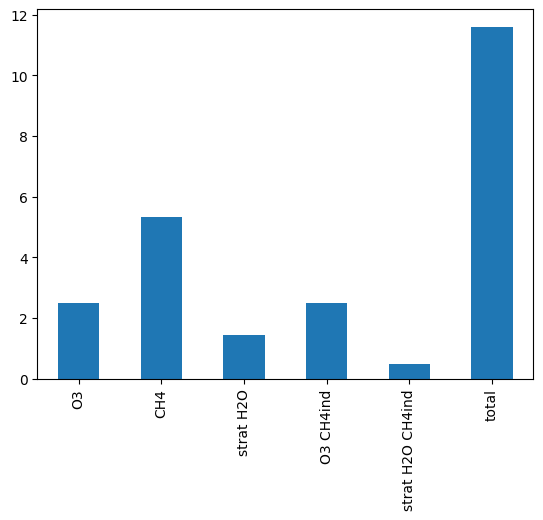

In [144]:
df_mm_h2_gwp.plot.bar()

In [146]:
antmod = len(df_h2_agwp_ch4.index)
df_ch4_gwp = pd.DataFrame(np.empty([4,antmod])*np.nan,columns=df_h2_agwp_ch4.index,
                         index=['O3','CH4','strat H2O','H2'])
#df_ch4_gwp_ua = unumpy.uarray(df_ch4_gwp, 0)

#df_ch4_gwp_udf = pd.DataFrame(df_ch4_gwp_ua, columns=df_h2_agwp_ch4.index,
#                         index=['O3','CH4','strat H2O','H2'])
#df_ch4_gwp_udf

df_ch4_gwp

,OSLOCTM3,WACCM6-2deg,INCA,GFDL-emi,OSLOCTM3-emi
O3,NaN,NaN,NaN,NaN,NaN
CH4,NaN,NaN,NaN,NaN,NaN
strat H2O,NaN,NaN,NaN,NaN,NaN
H2,NaN,NaN,NaN,NaN,NaN


In [147]:
df_ch4_agwp_o3 = df_ozone_rf.loc['10CH4']/df_ch4_surfconc.loc['deltaCH4']*df_surf_ch4_per_ch4_flux
df_ch4_agwp_o3.name = 'ch4_agwp_o3'



In [148]:
df_ch4_agwp_o3/agwp100_CO2 

OSLOCTM3       8.55
WACCM6-2deg    8.92
INCA           5.43
GFDL-emi        NaN
OSLOCTM3-emi   8.55
Name: ch4_agwp_o3, dtype: float64

In [156]:
df_ch4_gwp.loc['O3'] =df_ch4_agwp_o3/agwp100_CO2
df_ch4_gwp
df_mm_ch4_gwp['O3'] = df_ch4_gwp.loc['O3'].mean(axis=0)
df_mm_ch4_gwp

O3          7.86
CH4          NaN
strat H2O    NaN
H2           NaN
dtype: float64

In [157]:
df_ch4_agwp =df_surf_ch4_per_ch4_flux*spec_rf_ch4
df_ch4_agwp.name = 'ch4_agwp'

In [158]:
df_ch4_agwp/agwp100_CO2 

OSLOCTM3       16.7
WACCM6-2deg    16.7
INCA           19.3
GFDL-emi        NaN
OSLOCTM3-emi   16.7
Name: ch4_agwp, dtype: float64

In [160]:
#Add Methane GWP:
df_ch4_gwp.loc['CH4'] =df_ch4_agwp/agwp100_CO2 
df_mm_ch4_gwp.loc['CH4'] = df_ch4_gwp.loc['CH4'].mean(axis=0)
df_mm_ch4_gwp

O3          7.86
CH4         17.4
strat H2O    NaN
H2           NaN
dtype: float64

In [161]:
print(df_h2o_rf.loc['10CH4'])
df_ch4_agwp_h2o = df_h2o_rf.loc['10CH4']/df_ch4_surfconc.loc['deltaCH4']*df_surf_ch4_per_ch4_flux
df_ch4_agwp_h2o.name = 'ch4_agwp_h2o'

OSLOCTM3       10.1
WACCM6-2deg    3.76
INCA           4.58
OSLOCTM3-emi   10.1
Name: 10CH4, dtype: float64


In [162]:
df_ch4_gwp.loc['strat H2O'] = df_ch4_agwp_h2o/agwp100_CO2
df_mm_ch4_gwp.loc['strat H2O'] = df_ch4_gwp.loc['strat H2O'].mean(axis=0)
df_mm_ch4_gwp

O3          7.86
CH4         17.4
strat H2O   1.52
H2           NaN
dtype: float64

In [163]:
df_ch4_gwp.loc['H2'] = df_h2_flux_per_ch4_flux*df_h2_gwp.sum()
df_mm_ch4_gwp.loc['H2'] = df_ch4_gwp.loc['H2'].mean(axis=0)
df_mm_ch4_gwp

O3          7.86
CH4         17.4
strat H2O   1.52
H2          0.33
dtype: float64

In [164]:
#Save to file:
#print(outputpath + 'table_h2_gwp.csv')
#df_h2_gwp.to_csv(outputpath + 'table_h2_gwp.csv')
#df_h2_gwp.loc['total']=df_h2_gwp.sum()
df_mm_h2_gwp

O3                 2.48
CH4                5.32
strat H2O          1.44
O3 CH4ind          2.48
strat H2O CH4ind   0.48
total              11.6
dtype: float64

In [165]:
#df_ch4_gwp.to_csv(outputpath + 'table_ch4_gwp.csv')
#df_ch4_gwp.loc['total']=df_ch4_gwp.sum()
df_mm_ch4_gwp

O3          7.86
CH4         17.4
strat H2O   1.52
H2          0.33
dtype: float64

In [166]:
df_per_flux_h2 = pd.concat([df_h2_flux.loc['deltaH2'],df_surf_h2_per_h2_flux,
                            df_surf_ch4_per_h2_flux,df_ch4_flux_per_h2_flux,df_ch4_rf_per_h2_flux,
                            df_trop_du_ozone_per_h2_flux,df_strat_du_ozone_per_h2_flux,
                            df_strat_du_6060_ozone_per_h2_flux,df_strat_du_gt60_ozone_per_h2_flux,
                            df_ozone_rf_per_h2_flux,df_h2o_rf_per_h2_flux],axis=1, sort=False)

#Save to file:
#df_per_flux_h2.to_csv(outputpath + 'table_per_flux_h2.csv')

#Rename the columns:
columns_names={'deltaH2':'Flux H2 [Tg/yr]',
               'surf_h2_per_h2_flux': 'Surf. conc. H2 per flux [ppb yr/Tg]',
               'surf_ch4_per_h2_flux':'Surf. conc. CH4 per flux [ppb yr/Tg]',
               'ch4_flux_per_h2_flux':'Flux CH4/Flux H2 [Tg CH4/Tg H2]',
               'ch4_rf_per_h2_flux':'CH4 RF per flux [mW m-2 yr/ Tg]',
               'trop_du_ozone_per_h2_flux':'Trop. ozone per flux [DU yr/Tg]',
               'strat_du_ozone_per_h2_flux':'Strat. ozone per flux [DU yr/Tg]',
               'strat_du_6060_ozone_per_h2_flux':'Strat. ozone 60S-60N per flux [DU yr/Tg]',
               'strat_du_gt60_ozone_per_h2_flux':'Strat. ozone >60S/N per flux [DU yr/Tg]',
               'ozone_rf_per_h2_flux':'ozone RF per flux [mW m-2 yr/ Tg]',
               'h2o_rf_per_h2_flux':'Strat. H2O RF per flux [mW m-2 yr/ Tg]'}
#Rename column names:
df_per_flux_h2.rename(columns=dict(columns_names),inplace=True) #[df_per_flux_h2.columns])
df_per_flux_h2

NameError: name 'df_h2o_rf_per_h2_flux' is not defined

In [ ]:
df_per_flux_ch4 = pd.concat([df_ch4_flux.loc['deltaCH4'],df_surf_ch4_per_ch4_flux,
                            df_h2_flux_per_ch4_flux,df_trop_du_ozone_per_ch4_flux,df_strat_du_ozone_per_ch4_flux,
                            df_strat_du_6060_ozone_per_ch4_flux,df_strat_du_gt60_ozone_per_ch4_flux,
                            df_ozone_rf_per_ch4_flux,df_h2o_rf_per_ch4_flux],axis=1,sort=False)



               
#Save to file:
#df_per_flux_ch4.to_csv(outputpath + 'table_per_flux_ch4.csv')

#Rename the columns:
columns_names={'deltaCH4':'Flux CH4 [Tg/yr]',
               'surf_ch4_per_ch4_flux':'Surf. conc. CH4 per flux [ppb yr/Tg]',
               'h2_flux_per_ch4_flux':'Flux H2/Flux CH4 [Tg H2/Tg CH4]',
               'trop_du_ozone_per_ch4_flux':'Trop. ozone per flux [DU yr/Tg]',
               'strat_du_ozone_per_ch4_flux':'Strat. ozone per flux [DU yr/Tg]',
               'strat_du_6060_ozone_per_ch4_flux':'Strat. ozone 60S-60N per flux [DU yr/Tg]',
               'strat_du_gt60_ozone_per_ch4_flux':'Strat. ozone >60S/N per flux [DU yr/Tg]',
               'ozone_rf_per_ch4_flux':'ozone RF per flux [mW m-2 yr/ Tg]',
               'h2o_rf_per_ch4_flux':'Strat H2O RF per flux [mW m-2 yr/ Tg]'}
               
#Rename column names:
df_per_flux_ch4.rename(columns=dict(columns_names),inplace=True) #[df_per_flux_h2.columns])
df_per_flux_ch4          

In [ ]:
df_budget_h2 = pd.concat([df_h2_burden.loc['CTRL'],df_h2_lifetime.loc['CTRL'],
                          df_h2_atmloss.loc['CTRL'],df_h2_drydep.loc['CTRL'],
                          df_h2_atmprod.loc['CTRL'],df_h2_atm_lifetime.loc['CTRL'],
                          df_h2_estemis],axis=1)

df_budget_h2.columns = ['H2 burden [Tg]',
                        'H2 lifetime [yrs]',
                        'H2 atm.loss[Tg/yr]',
                        'H2 drydep [Tg/yr]',
                        'H2 atm. prod [Tg/yr]',
                        'H2 atmospheric lifetime [yrs]',
                        'H2 estimated emissions [Tg/yr]']

#df_budget_h2.to_csv(outputpath + 'table_budget_h2.csv')
df_budget_h2

In [ ]:
df_budget_ch4 = pd.concat([df_ch4_burden.loc['CTRL'],df_ch4_lifetime.loc['CTRL'],
                           df_ch4_loss.loc['CTRL']],axis=1)
df_budget_ch4.columns = ['CH4 burden [Tg]','CH4 lifetime [yrs]','CH4 atm.loss[Tg/yr]'] 
df_budget_ch4

In [ ]:
df_ch4_burden_per_conc  = df_ch4_burden.loc['deltaCH4']/df_ch4_surfconc.loc['deltaCH4']
df_ch4_burden_per_conc.name = 'ch4_burden_per_conc'
df_ch4_burden_per_conc

In [ ]:
df_w_o_feedback =df_ch4_lifetime.loc['CTRL']/df_ch4_burden_per_conc #Lifetime [yr] / [Tg/ppb] 
df_w_o_feedback

In [ ]:
df_feedback_factor_ch4 = df_surf_ch4_per_ch4_flux/df_w_o_feedback
df_feedback_factor_ch4.name = 'feedback_factor_ch4'
df_feedback_factor_ch4

In [ ]:
df_h2_burden_per_conc  = df_h2_burden.loc['deltaH2']/df_h2_surfconc.loc['deltaH2']
df_h2_burden_per_conc.name = 'h2_burden_per_conc'
df_h2_burden_per_conc

In [ ]:
df_w_o_feedback_h2 =df_h2_lifetime.loc['CTRL']/df_h2_burden_per_conc #Lifetime [yr] / [Tg/ppb] 
df_w_o_feedback_h2

In [ ]:
df_feedback_factor_h2 = df_surf_h2_per_h2_flux/df_w_o_feedback_h2
df_feedback_factor_h2.name = 'feedback_factor_h2'
df_feedback_factor_h2
#Fabien wrote in the paper about feedback factor less than 1.